In [1]:
#importing the libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.facecolor':'yellow'})

In [2]:
#setting option to display all the rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### 1. Data Collection

In [3]:
#collecting data from csv file
#loading the dataset
df_copy=pd.read_csv(r"C:\Users\acer\Desktop\Model_Deployment_Wine_quality_DataSet\data\winequality-red.csv")
df=df_copy   #not to modify the original dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#getting information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#shape and size of the dataframe
print('shape of the dataframe-rows and columns',df.shape)
print('size of the dataframe-rows*columns',df.size)

shape of the dataframe-rows and columns (1599, 12)
size of the dataframe-rows*columns 19188


In [7]:
#checking the number of numerical variables and categorical variables
categorical_var=[i for i in df.columns if df[i].dtypes=='string']
print('categorical variables in the dataframe',categorical_var)

numerical_var=[j for j in df.columns if df[j].dtypes in ['int64','float64']]
print('numerical variables in the dataframe',numerical_var)

categorical variables in the dataframe []
numerical variables in the dataframe ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


### 2. Data Preprocessing and Feature Engineering

- handling misssing values and doing missing values imputation
- checking outliers
- convert categorical variables or datatypes conversion
- removing unwanted data, duplicate values .....

Feature Scaling: 
  Standarization Scaling, Min-Max Scaling

Dimensionality reduction: 

  a.feature selection:  
  1.filter methods
  2.wrapper methods
  3.Embedded methods

  b.feature extractions:
  1.PCA
  2.LDA

In [8]:
df.isnull().sum() #we can use mean()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.duplicated().mean()

0.150093808630394

In [10]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

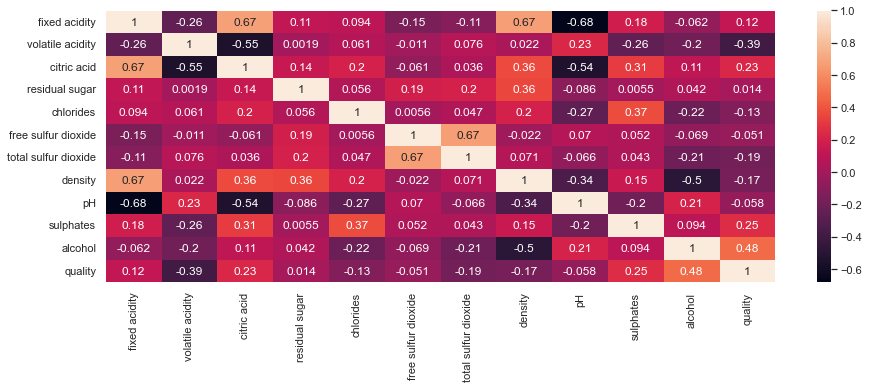

In [11]:
#using heatmap to see correlation between the variables
plt.figure(figsize=(15,5))
sns.set(rc={'figure.facecolor':'yellow'})
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:ylabel='Count'>

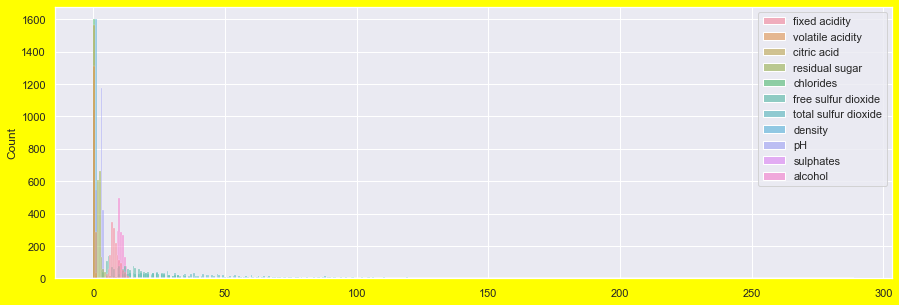

In [12]:
#checking whole data distribution of the Independent variables
plt.figure(figsize=(15,5))
sns.histplot(data=df.drop(columns=['quality'],axis=1))

<AxesSubplot:>

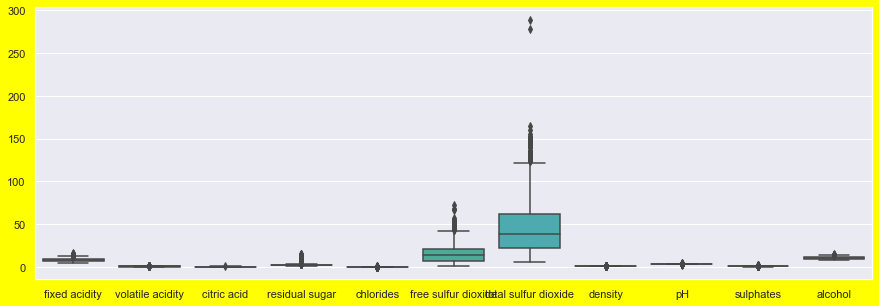

In [13]:
#checking the outliers in the dataframe using boxplot and voilinplot
plt.figure(figsize=(15,5))
sns.boxplot(data=df.drop(columns=['quality'],axis=1))

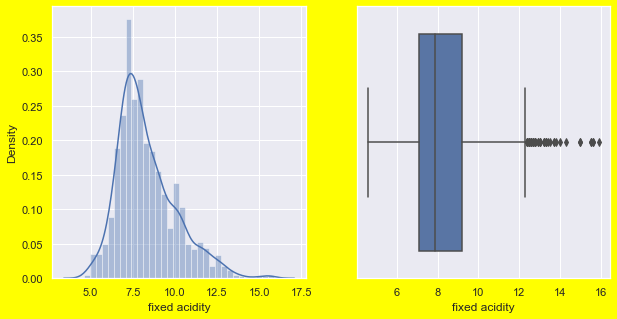

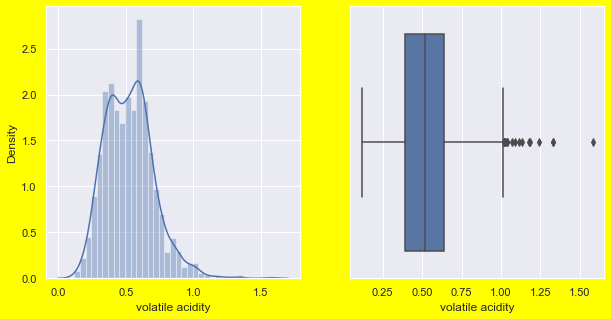

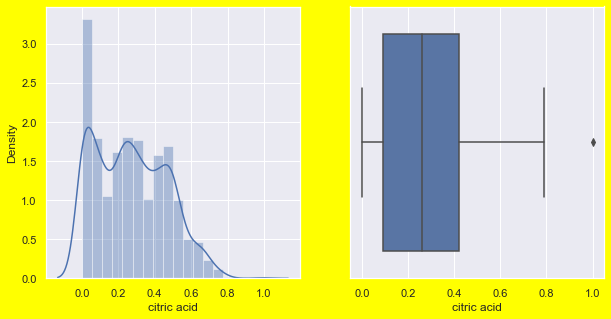

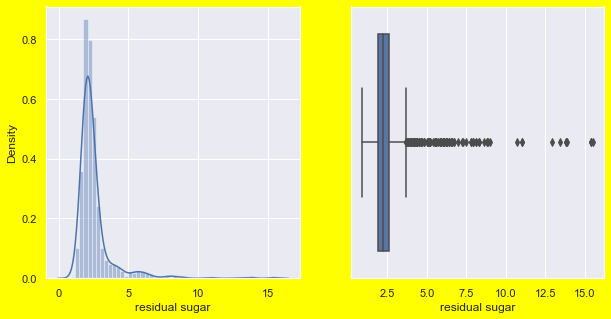

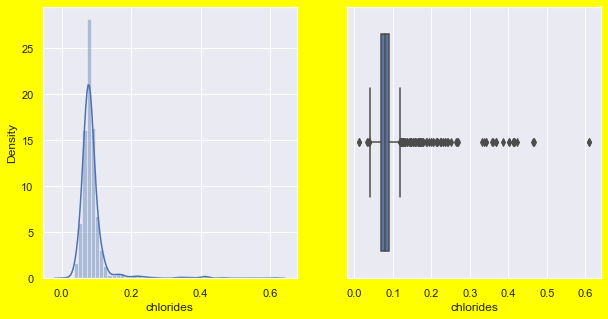

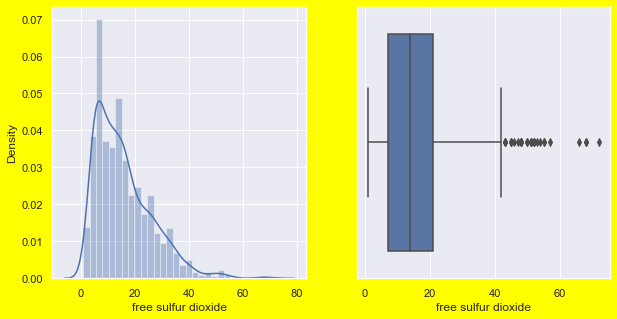

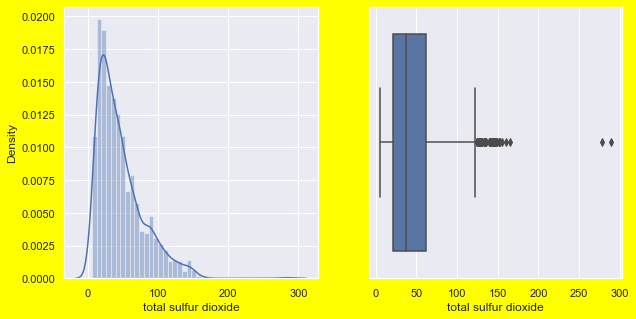

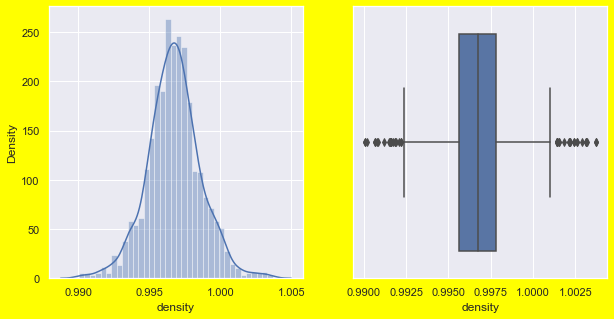

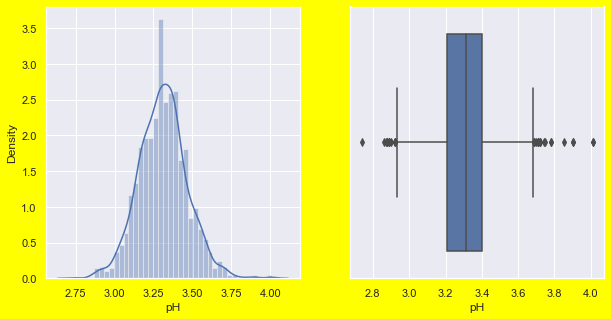

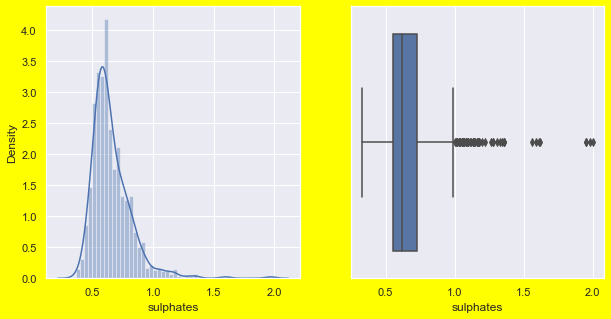

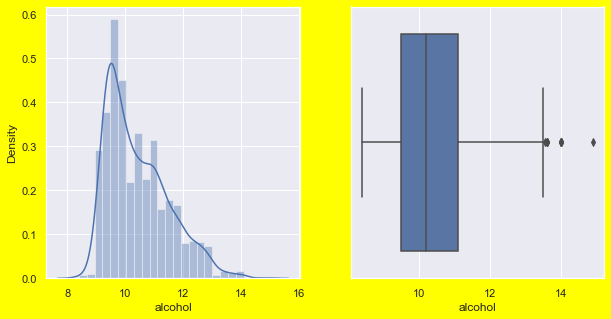

In [14]:
for index, var in enumerate(df.iloc[:,:-1]):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(df[var])
    plt.subplot(1,2,2)
    sns.boxplot(df[var])
    plt.show()

In [15]:
#analysis about the target variable
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [16]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

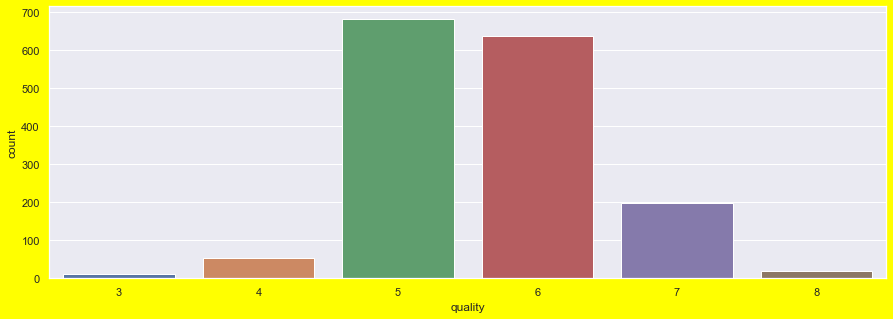

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(df['quality'])

In [18]:
df_features=df.drop(columns=['quality'],axis=1)
df_target=df['quality']

In [19]:
#detecting the number of outliers
for index,j in enumerate(df_features.columns):
    q1=df[j].quantile(0.25)
    q3=df[j].quantile(0.75)
    iqr=q3-q1
    u=q3+1.5*iqr
    l=q1-1.5*iqr
    
    print('upper_limit',df_features[df_features[j]>u].count()[j])
    print('lower_limit',df_features[df_features[j]<l].count()[j])

    #outlier removal from the variables
    df = df_features[df_features[j] < u]
    df = df_features[df_features[j] > l]
    
#detecting the outliers
#q1=df.iloc[:,:-1].quantile(0.25)
#q3=df.iloc[:,:-1].quantile(0.75)
#iqr=q3-q1  #difference between the maximum and minimum

#upper_limit=q3+1.5*iqr
#lower_limit=q1-1.5*iqr

#print('values which are upper limit:',df.columns[[df.columns]>upper_limit].count()[df])
#print('values whic are lower limit',  df.columns[[df.columns]<upper_limit].count()[df])

upper_limit 49
lower_limit 0
upper_limit 19
lower_limit 0
upper_limit 1
lower_limit 0
upper_limit 155
lower_limit 0
upper_limit 103
lower_limit 9
upper_limit 30
lower_limit 0
upper_limit 55
lower_limit 0
upper_limit 24
lower_limit 21
upper_limit 21
lower_limit 14
upper_limit 59
lower_limit 0
upper_limit 13
lower_limit 0


In [20]:
#checking the relationship between independent and dependent (target) variable
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

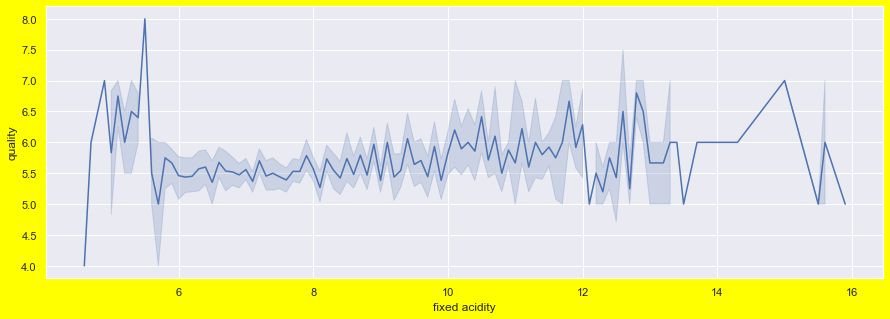

In [21]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['fixed acidity'],y=df_target)

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

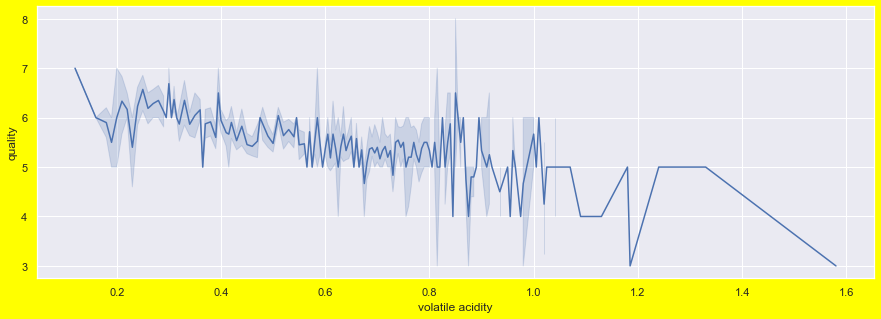

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(df['volatile acidity'],y=df_target)

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

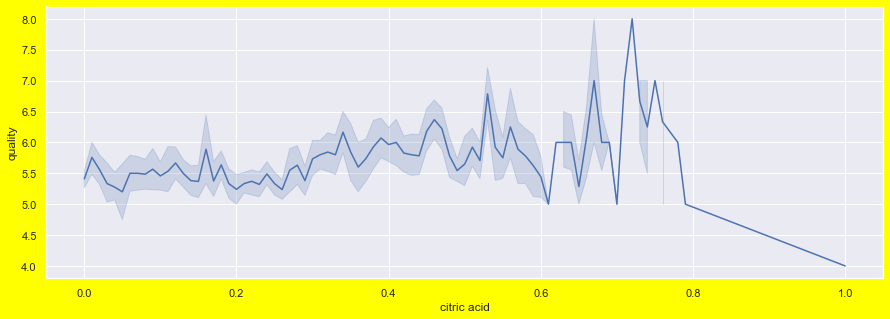

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['citric acid'],y=df_target)

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

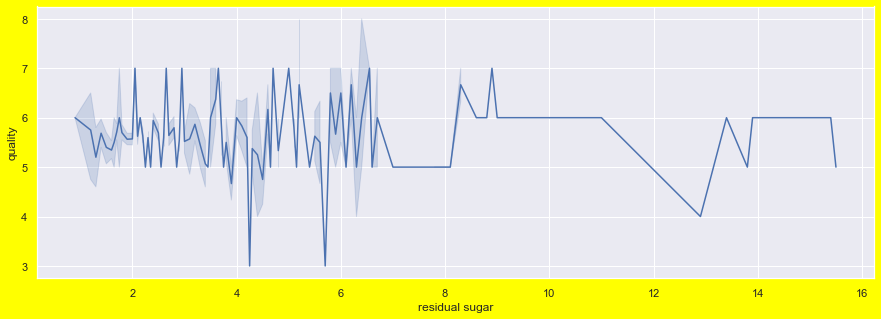

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['residual sugar'],y=df_target)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

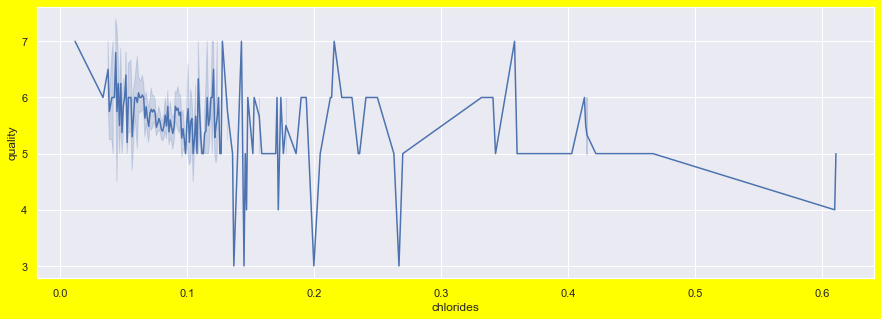

In [25]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['chlorides'],y=df_target)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

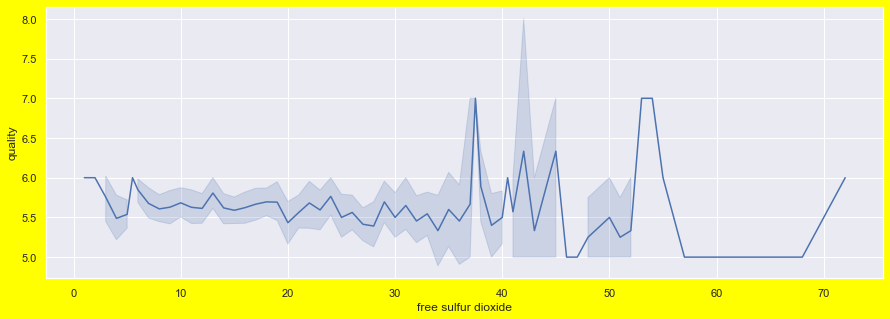

In [26]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['free sulfur dioxide'],y=df_target)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

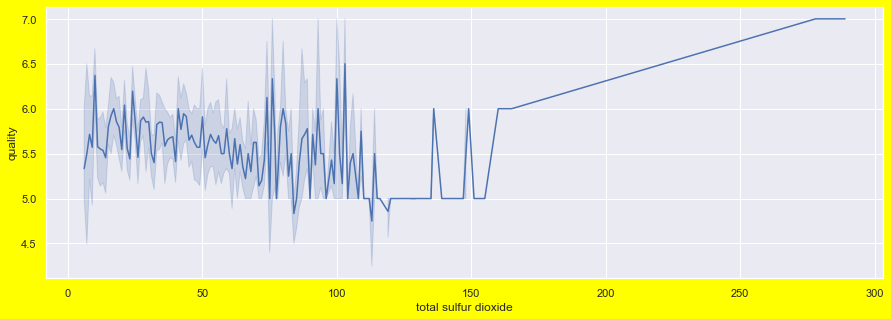

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['total sulfur dioxide'],y=df_target)

<AxesSubplot:xlabel='density', ylabel='quality'>

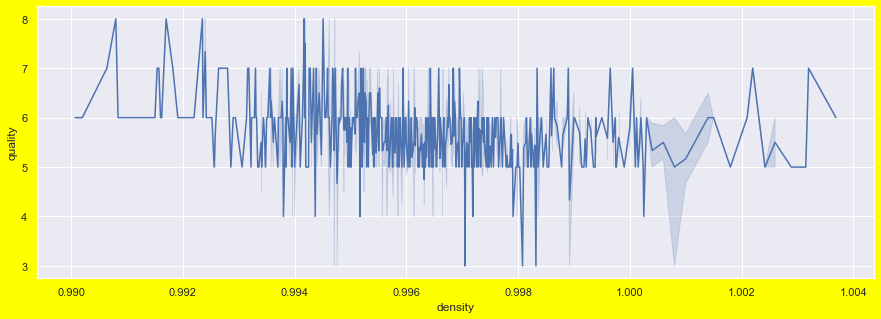

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['density'],y=df_target)

<AxesSubplot:xlabel='pH', ylabel='quality'>

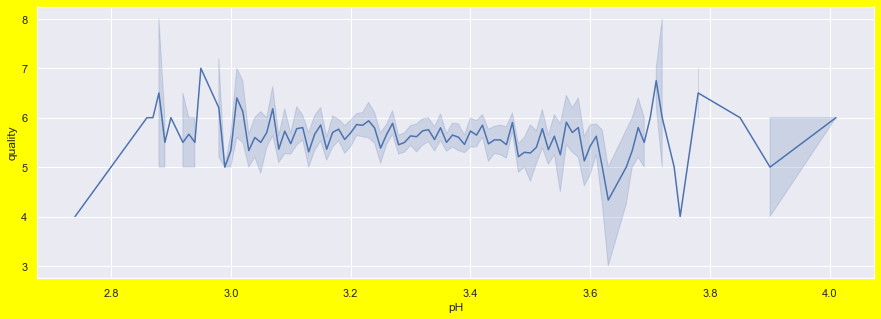

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['pH'],y=df_target)

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

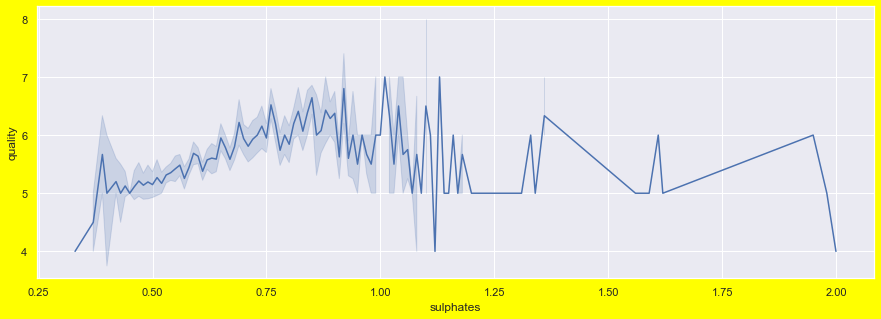

In [30]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['sulphates'],y=df_target)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

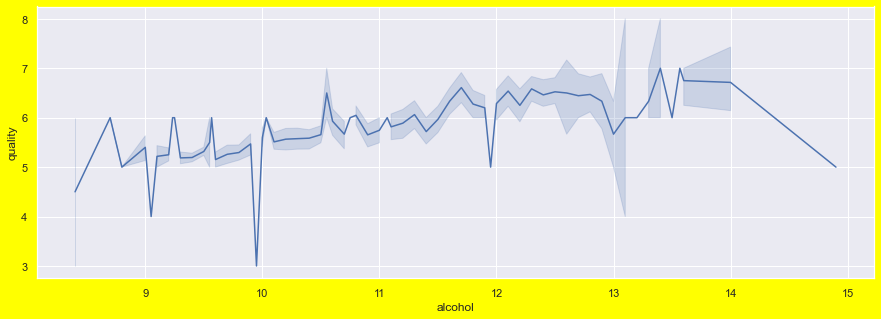

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['alcohol'],y=df_target)

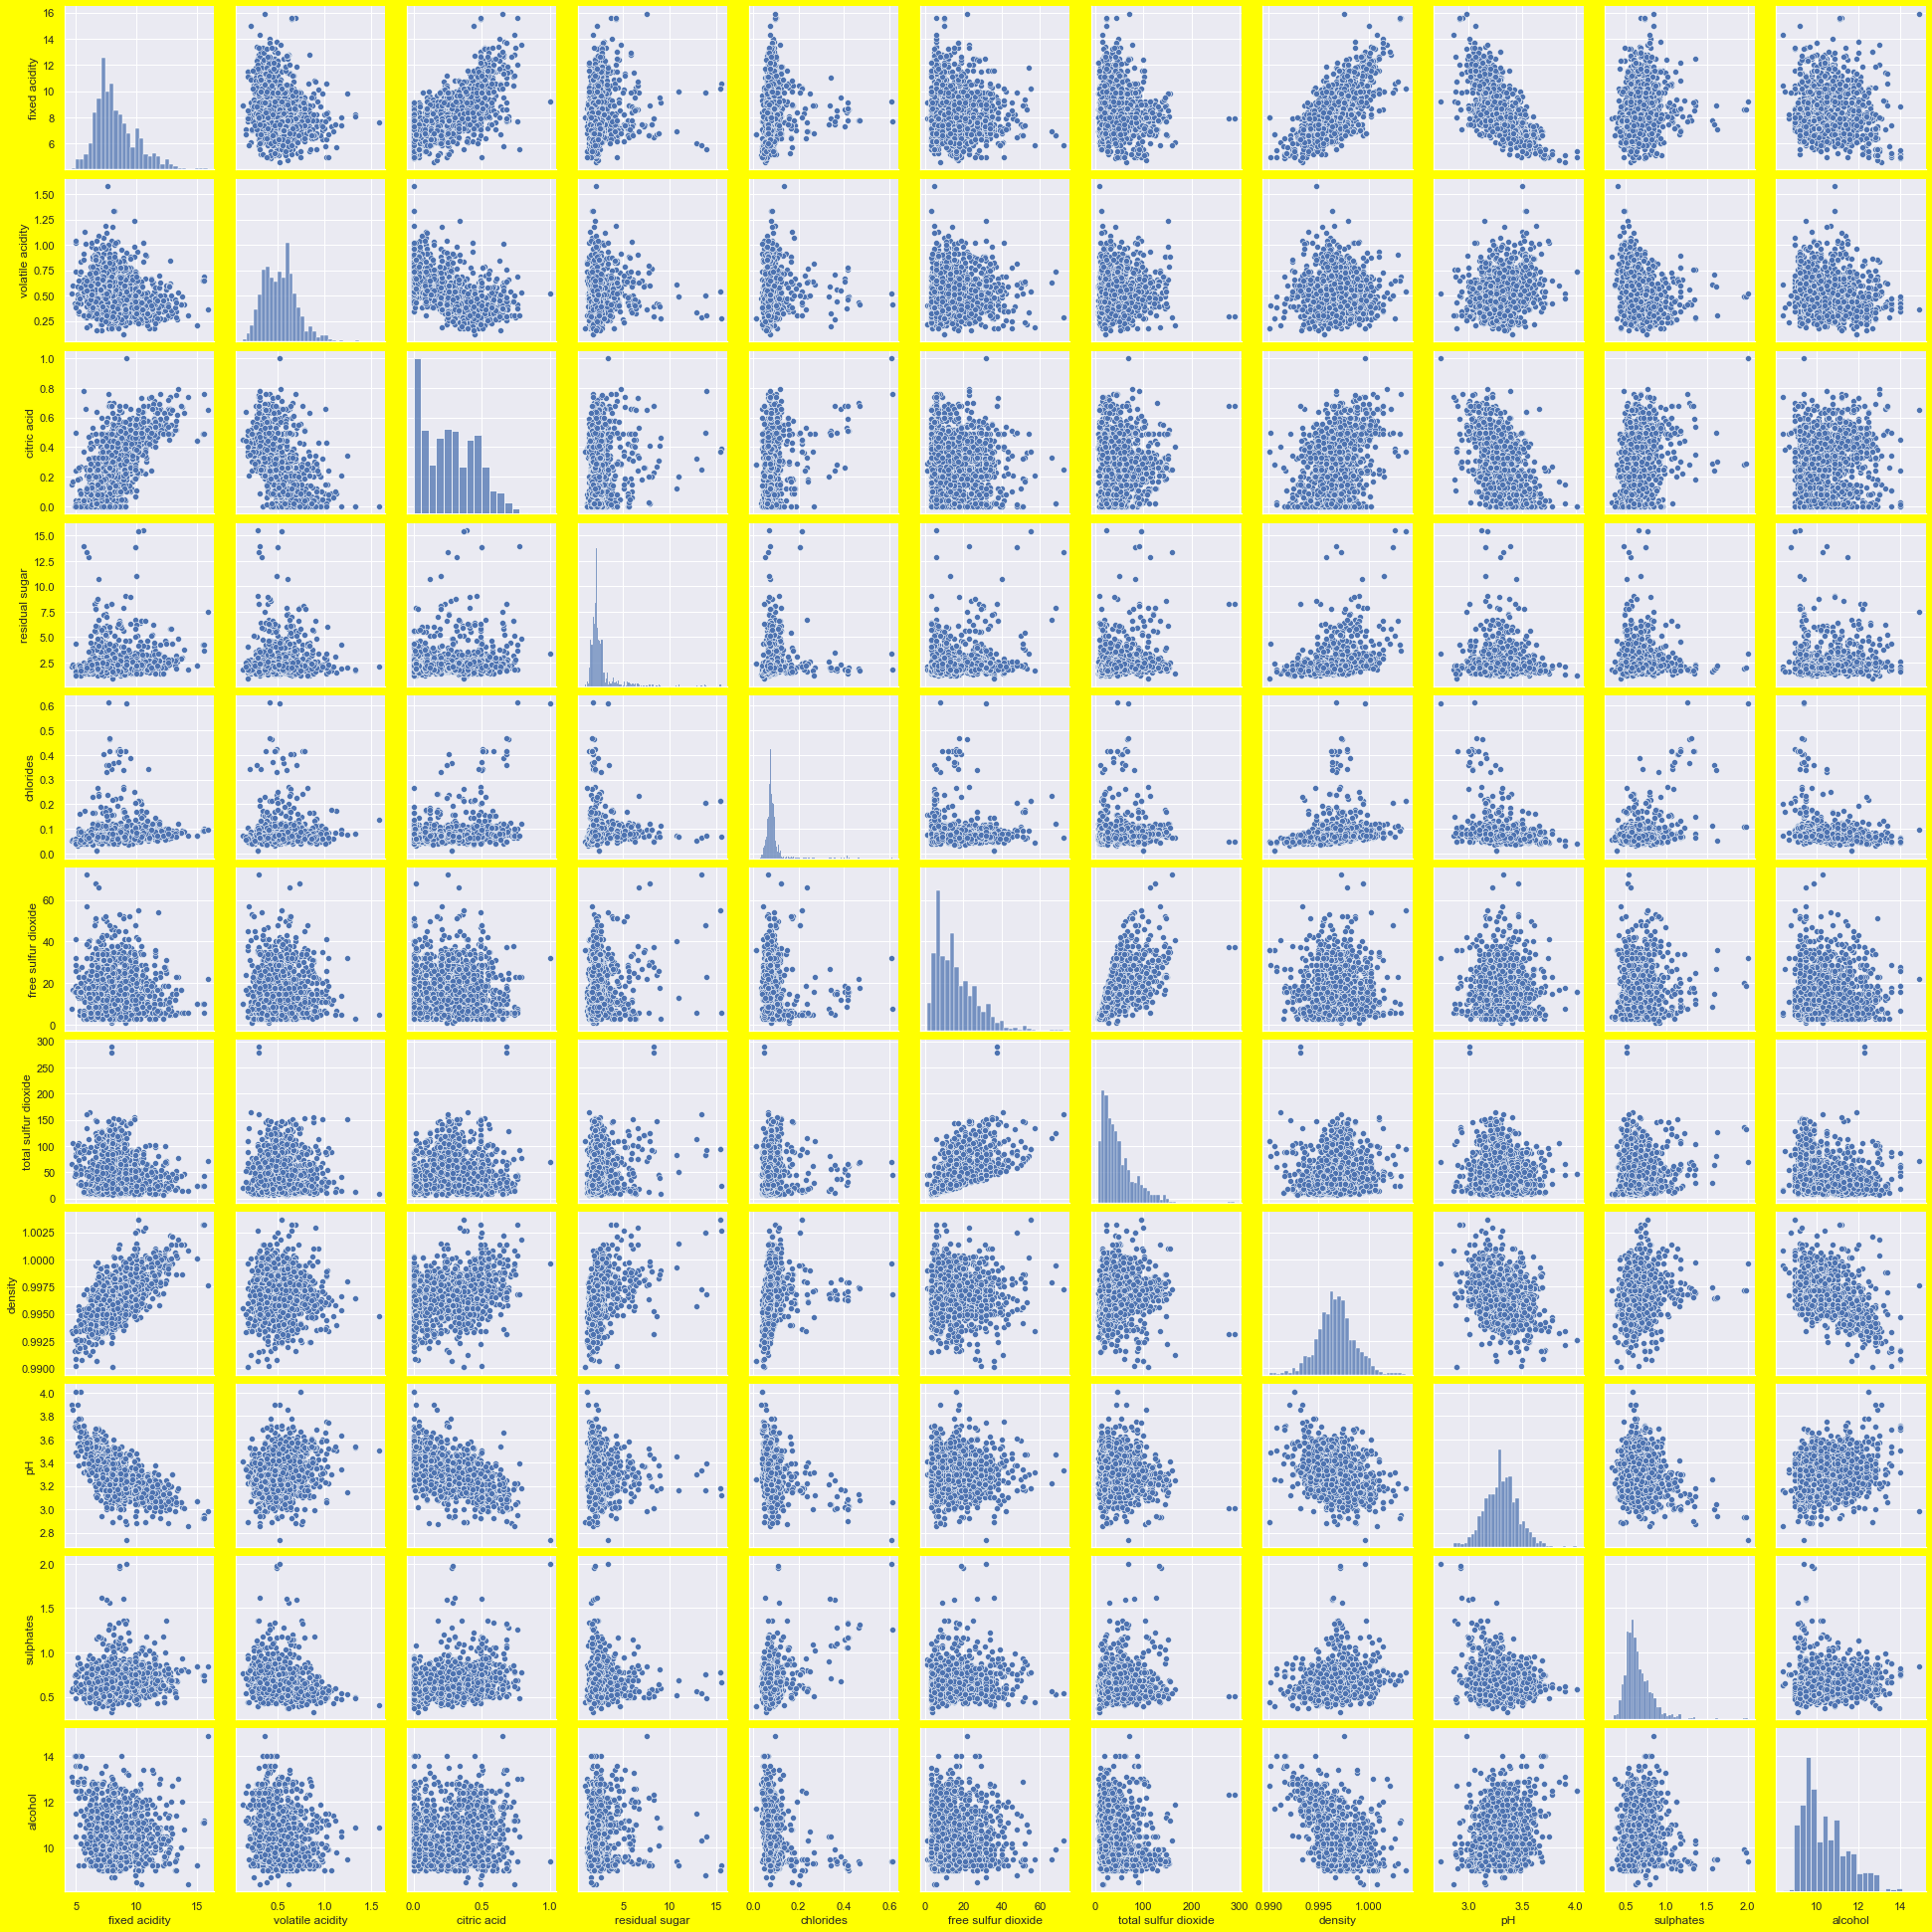

In [32]:
sns.pairplot(data=df)

In [33]:
#checking the varaiable to do encoding
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [34]:
#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
#independent and dependent features
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [36]:
#spliting the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1119, 10), (480, 10), (1119,), (480,))

In [38]:
#standardization scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [39]:
#feature selection
select_features=SelectKBest(score_func=f_regression,k='all')
select_features.fit(X_train,y_train)
X_train=select_features.transform(X_train)
X_test=select_features.transform(X_test)
X_train.shape

(1119, 10)

In [40]:
#linear regression algorithm
#fit the model
lr=LinearRegression()
lr.fit(X_train,y_train)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

#evaluate the model
y_pred=lr.predict(X_test)

0.6764421844851458
0.6425574037405339


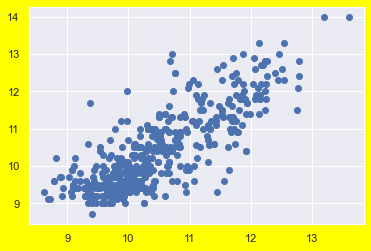

In [41]:
plt.scatter(y_pred,y_test)

In [42]:
#evaluation predictions
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [43]:
print('evaluate predictions:')
print('mean absolute error:', mae)
print('mean squared error:', mse)
print('root mean squared error:', rmse)

evaluate predictions:
mean absolute error: 0.48167568289485363
mean squared error: 0.3882695030400896
root mean squared error: 0.6231127530712958


In [44]:
#dumping to pickle file
with open("C:\\Users\\acer\\Desktop\\Model_Deployment_Wine_quality_DataSet\\models\\best_model.pkl",'wb') as f:
    pickle.dump(lr,f)

In [45]:
model=pickle.load(open('C:\\Users\\acer\\Desktop\\Model_Deployment_Wine_quality_DataSet\\models\\best_model.pkl','rb'))
model

LinearRegression()

In [46]:
# Loading model to compare the results
pred=model.predict([[7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,]])
print(pred)
if pred[0]==1:
    print('Best quality wine')
else:
    print('Poor quality wine')

[17.18871553]
Poor quality wine


In [47]:
# input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0,3.39,0.47,1.0)
# # Changing the input data in to a numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # Reshape the data as we are predicting the label for only one instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = model.predict(input_data_reshaped)
# print(prediction)

# if prediction[0]==1: 
#     print('Good Quality Wine')
# else:
#     print('Bad Quality Wine')